<a href="https://colab.research.google.com/github/amalsalilan/GlucoSense_AI-Powered_Diabetes_Detection_for_Early_Intervention_Infosys_Internship_Oct2025/blob/M-S-Ansari/M_S_Ansari_AI_Powered_Early_Detection_of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import kagglehub

path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1


In [ ]:
df = pd.read_csv(path + "/diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df[df['gender'] == 'Other'].head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


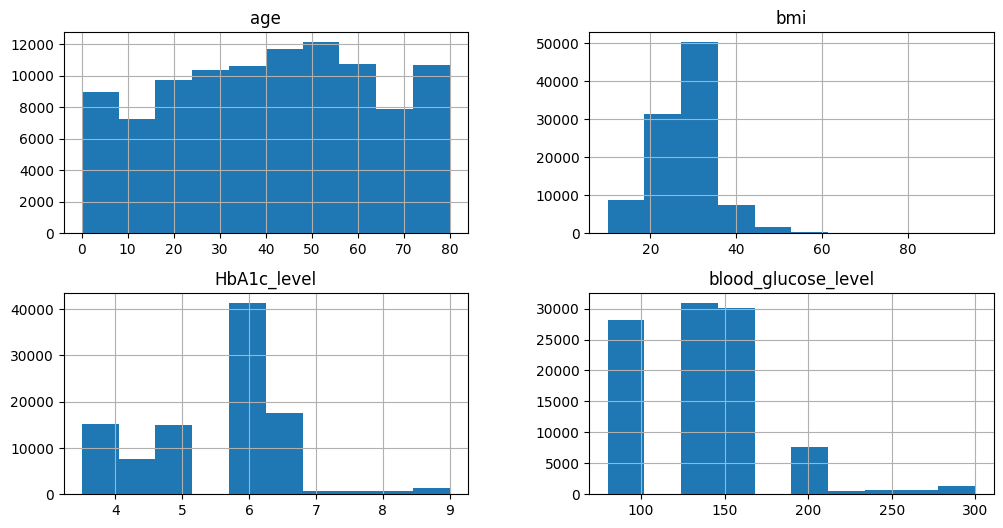

In [ ]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].hist(figsize=(12,6))
plt.show()

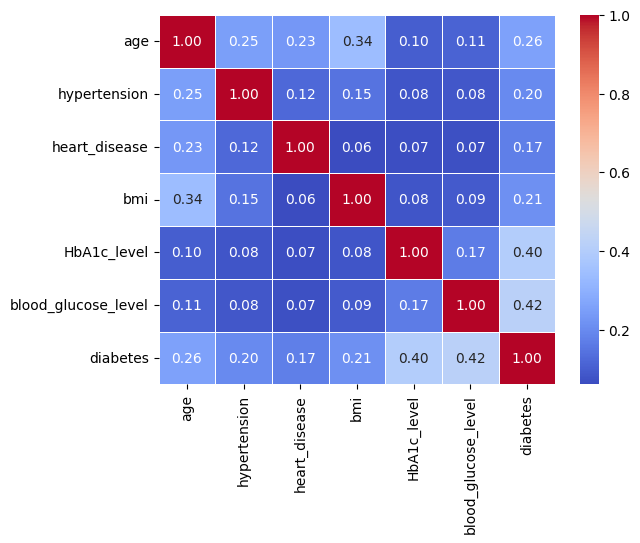

In [ ]:
corr_1 = df.corr(numeric_only=True)

sns.heatmap(corr_1, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.show()

In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "PreObese"
    elif 30 <= bmi < 34.9:
        return "Obese (Class I)"
    elif 35 <= bmi < 39.9:
        return "Obese (Class II)"
    else:
        return "Obese (Class III)"

df["bmi_category"] = df["bmi"].apply(categorize_bmi)


In [ ]:
age_bins = [0, 20, 40, 60, 100]
age_labels = ["0-20", "21-40", "41-60", "61+"]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)

In [ ]:
df["risk_score"] = (
    (df['age'] * 0.26) + (df['hypertension'] * 0.20) + (df['heart_disease'] * 0.17) +
    (df['bmi'] * 0.21) + (df['HbA1c_level'] * 0.40) + (df['blood_glucose_level'] * 0.42)
)

# Normalize to 0-100 range
df["risk_score"] = (df["risk_score"] - df["risk_score"].min()) / \
                   (df["risk_score"].max() - df["risk_score"].min()) * 100

def categorize_risk(score):
    if score < 30:
        return "Low"
    elif 30 <= score < 60:
        return "Medium"
    else:
        return "High"

df["risk_category"] = df["risk_score"].apply(categorize_risk)


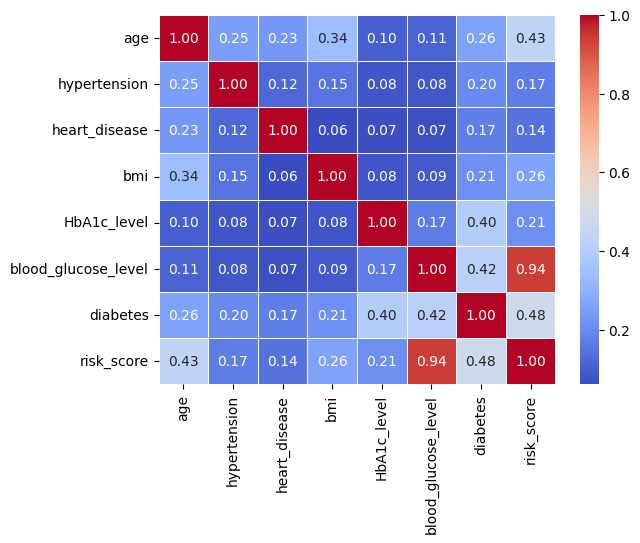

In [ ]:
corr_2 = df.corr(numeric_only=True)

sns.heatmap(corr_2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.show()

In [ ]:
labels = ["Non-Diabetic", "Diabetic"]
values = df["diabetes"].value_counts().tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.update_layout(title_text="Diabetes Class Distribution")

fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="diabetes", color="gender", pattern_shape="diabetes")
fig.update_layout(bargap=0.4)
fig.show()

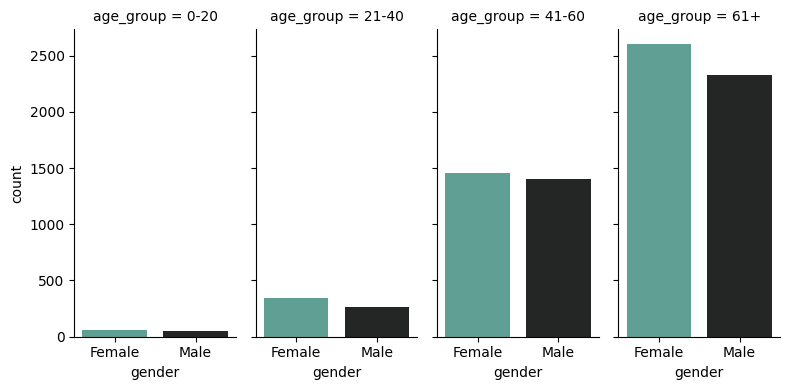

In [ ]:
df_diabetic = df[df["diabetes"] == 1]

ax =  sns.catplot(
      data=df_diabetic, kind="count",
      x="gender", col="age_group",
      height=4, aspect=0.5,
      palette="dark:#5A9_r", hue = "gender"
  )

plt.show()

In [ ]:
smoking_counts = df_diabetic["smoking_history"].value_counts().reset_index()
smoking_counts.columns = ["Smoking History", "Count"]

fig = px.bar(smoking_counts, x="Smoking History", y="Count",
             title="Diabetes Cases by Smoking History (Only Diabetics)",
             color="Smoking History",
             text="Count")

fig.update_traces(textposition="outside")
fig.show()

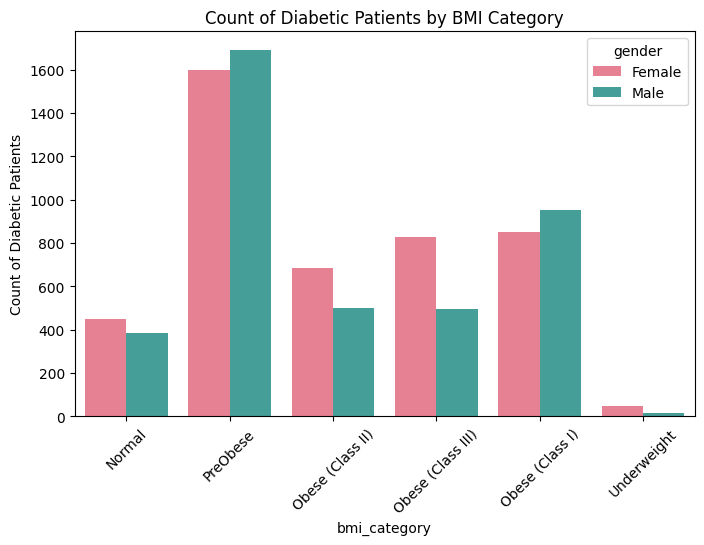

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=df_diabetic["bmi_category"], y=df_diabetic["diabetes"],
            palette="husl", hue = df_diabetic["gender"],
            estimator=lambda x: len(x), ax=ax)

ax.set_title("Count of Diabetic Patients by BMI Category")
ax.set_ylabel("Count of Diabetic Patients")
plt.xticks(rotation=45)

plt.show()

In [ ]:
fig = px.scatter(df, x="blood_glucose_level", y="risk_score", color="HbA1c_level", facet_col="gender", facet_row="diabetes")
fig.show()

In [ ]:
df["Comorbidity"] = df.apply(lambda row:
    "Both" if row["hypertension"] == 1 and row["heart_disease"] == 1 else
    "Hypertension Only" if row["hypertension"] == 1 else
    "Heart Disease Only" if row["heart_disease"] == 1 else
    "No Comorbidities", axis=1)

# Count of diabetic and non-diabetic persons in each comorbidity group
comorbidity_counts = df.groupby(["Comorbidity", "diabetes"]).size().reset_index(name="Count")

# Convert diabetes values to labels
comorbidity_counts["diabetes"] = comorbidity_counts["diabetes"].map({0: "Non-Diabetic", 1: "Diabetic"})

fig = px.bar(comorbidity_counts, x="Comorbidity", y="Count", color="diabetes",
             title="Diabetes and Non-Diabetes Counts by Comorbidity Condition",
             labels={"Comorbidity": "Comorbidity Condition", "Count": "Count of People", "diabetes": "Diabetes Status"},
             barmode="group")

fig.show()
